In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Data Collection and Pre-processing

In [2]:
df = pd.read_csv('./data/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [7]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [8]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [9]:
sns.set()

C:\Users\Rahul\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

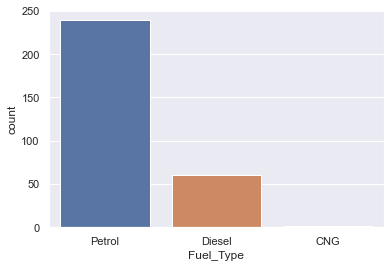

In [10]:
sns.countplot('Fuel_Type', data=df)

C:\Users\Rahul\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

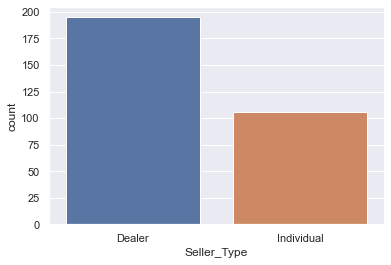

In [11]:
sns.countplot('Seller_Type', data=df)

C:\Users\Rahul\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='count'>

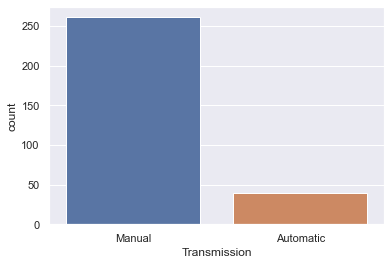

In [12]:
sns.countplot('Transmission', data=df)

# Encoding Categorical values

      Fuel:
petrol-------> 0

diesel-------> 1 

cng---------->2

In [13]:
df.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


     Transmission
     
 manual------->0
 
 
 automatic---->1 

In [14]:
df.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)


        Seller_Type
        
Dealer--------->0

Individual----->1

In [15]:
df.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)


In [16]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,1,0,0,0
297,brio,2015,4.00,5.9,60000,0,0,0,0
298,city,2009,3.35,11.0,87934,0,0,0,0
299,city,2017,11.50,12.5,9000,1,0,0,0
300,brio,2016,5.30,5.9,5464,0,0,0,0


In [17]:
# Creating features and target
X = df.drop(columns=['Car_Name', 'Selling_Price'], axis=1)
Y = df['Selling_Price']

In [18]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [20]:
# Splitting the data into train and test data
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.20, random_state=10)


In [21]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (240, 7) (61, 7)


# Training the model

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, Y_train)

LinearRegression()

In [24]:
# Model Evaluation on training data
X_train_predict = model.predict(X_train)
# print(X_train_predict)

In [25]:
# Using r2 error to check the error score
X_train_error = metrics.r2_score(Y_train, X_train_predict)
print(X_train_error)

0.8843647367786591


# Plotting the actual price vs predicted price

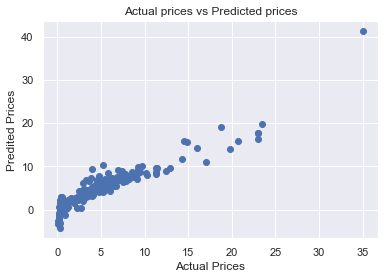

In [26]:

plt.scatter(Y_train, X_train_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predited Prices')
plt.title("Actual prices vs Predicted prices")
plt.show()

In [27]:
# Predicting on test data
X_test_predict = model.predict(X_test)
X_test_error = metrics.r2_score(Y_test, X_test_predict)
print(X_test_error)

0.8434932173887036


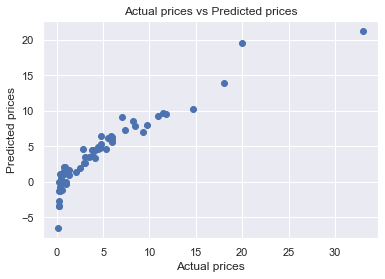

In [28]:
plt.scatter(Y_test, X_test_predict)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

# Now we will implement lasso regression


In [29]:
L_model = Lasso()

In [30]:
L_model.fit(X_train, Y_train)

Lasso()

In [31]:
# predicting on training data
XL_train_predict = L_model.predict(X_train)
# print(XL_train_predict)
XL_train_error = metrics.r2_score(Y_train, XL_train_predict)
print(XL_train_error)

0.8424684224488146


In [32]:
# Predicting on testing data
XL_test_predict = L_model.predict(X_test)
# print(XL_test_predict)

XL_test_error = metrics.r2_score(Y_test, XL_test_predict)
print(XL_test_error)

0.8020492662138775


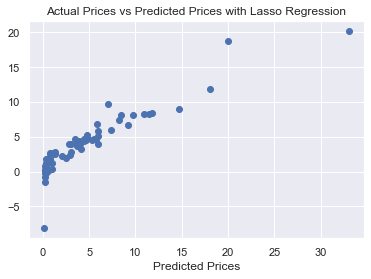

In [33]:
plt.scatter(Y_test, XL_test_predict)
plt.xlabel("Actual Prices")
plt.xlabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices with Lasso Regression")
plt.show()

# Predictive System

In [34]:
# input_data = (2014,5.59,27000,0,0,0,0)
# input_arr = np.asarray(input_data)
# input_arr_reshaped = input_arr.reshape(1, -1)
# result = L_model.predict(input_arr_reshaped)
# print(result)

In [35]:
def prediction(x):
    arr_reshaped = x.reshape(1,-1)
    result = L_model.predict(arr_reshaped)
    return result

In [38]:
data = input().split(",")
arr = np.asarray(data)
predict = prediction(arr)
print("The predicted price of the car you want to buy is : ",predict,"Lakhs")

2015,7.13,35866,0,0,0,1
The predicted price of the car you want to buy is :  [4.65837886] Lakhs


C:\Users\Rahul\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\Rahul\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
